In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
%matplotlib inline

In [3]:
# Load the dataset
df = pd.read_csv('heart_disease_uci.csv')

# First look at the data
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (920, 16)

First few rows:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
# Dataset info and data types
print("Data Types:")
print(df.dtypes)
print(f"\n{'='*50}")
print("\nDataset Info:")
df.info()

Data Types:
id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-nul

In [7]:
# Check for missing values
print("Missing Values Count:")
print(df.isnull().sum())
print(f"\nMissing Values Percentage:")
print((df.isnull().sum() / len(df) * 100).round(2))

Missing Values Count:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Missing Values Percentage:
id           0.00
age          0.00
sex          0.00
dataset      0.00
cp           0.00
trestbps     6.41
chol         3.26
fbs          9.78
restecg      0.22
thalch       5.98
exang        5.98
oldpeak      6.74
slope       33.59
ca          66.41
thal        52.83
num          0.00
dtype: float64


## Data Cleaning

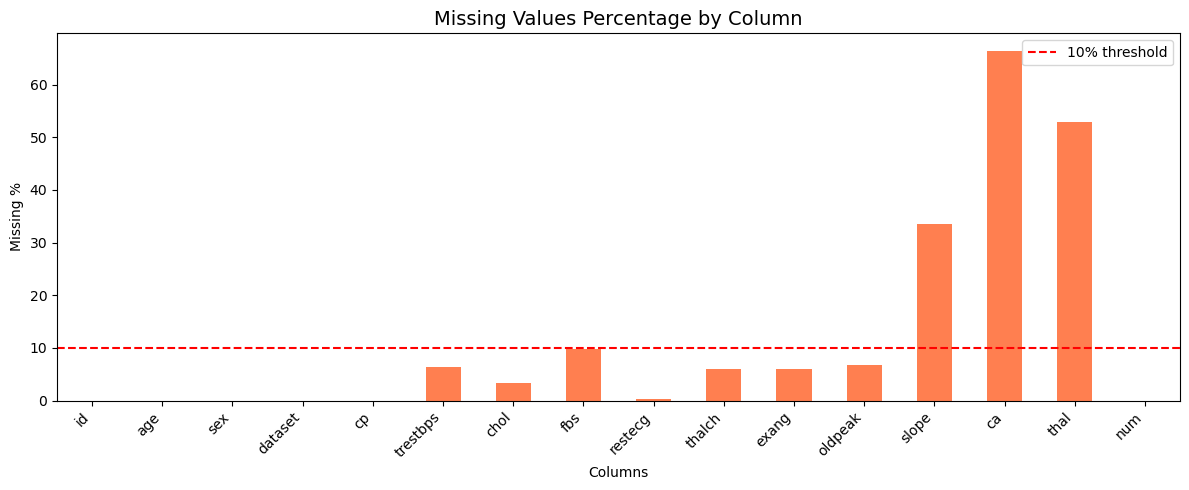

In [10]:
# Visualize missing values
fig, ax = plt.subplots(figsize=(12, 5))
missing_pct = (df.isnull().sum() / len(df) * 100)
missing_pct.plot(kind='bar', color='coral', ax=ax)
ax.set_title('Missing Values Percentage by Column', fontsize=14)
ax.set_xlabel('Columns')
ax.set_ylabel('Missing %')
ax.axhline(y=10, color='red', linestyle='--', label='10% threshold')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New shape: {df.shape}")

Number of duplicate rows: 0


In [ ]:
# Create missing indicators for high-missing columns before imputation
# This preserves the information that a value was missing (could be predictive)
high_missing_cols = ['ca', 'thal', 'slope']

print("Creating missing indicators for high-missing columns:")
for col in high_missing_cols:
    missing_pct = df[col].isnull().sum() / len(df) * 100
    if missing_pct > 20:
        indicator_col = f'{col}_missing'
        df[indicator_col] = df[col].isnull().astype(int)
        print(f"  Created {indicator_col} (original had {missing_pct:.1f}% missing)")

print(f"\nNew columns added: {[col for col in df.columns if '_missing' in col]}")

In [ ]:
# Handle missing values
# For numerical columns: fill with median (robust to outliers)
# For categorical columns: fill with mode

numerical_cols = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
categorical_cols = ['fbs', 'restecg', 'exang', 'slope', 'thal']

# First, handle problematic zero values in medical measurements
# Zero values for blood pressure and cholesterol are medically impossible
medical_cols_with_zeros = ['trestbps', 'chol']
for col in medical_cols_with_zeros:
    zero_count = (df[col] == 0).sum()
    if zero_count > 0:
        print(f"Found {zero_count} zero values in {col} - treating as missing")
        df.loc[df[col] == 0, col] = np.nan

# Fill numerical missing values with median
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"Filled {col} missing values with median: {median_val}")

# Fill categorical missing values with mode
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
        print(f"Filled {col} missing values with mode: {mode_val}")

print(f"\nRemaining missing values: {df.isnull().sum().sum()}")

Target variable distribution:
heart_disease
1    509
0    411
Name: count, dtype: int64

Percentage with heart disease: 55.33%


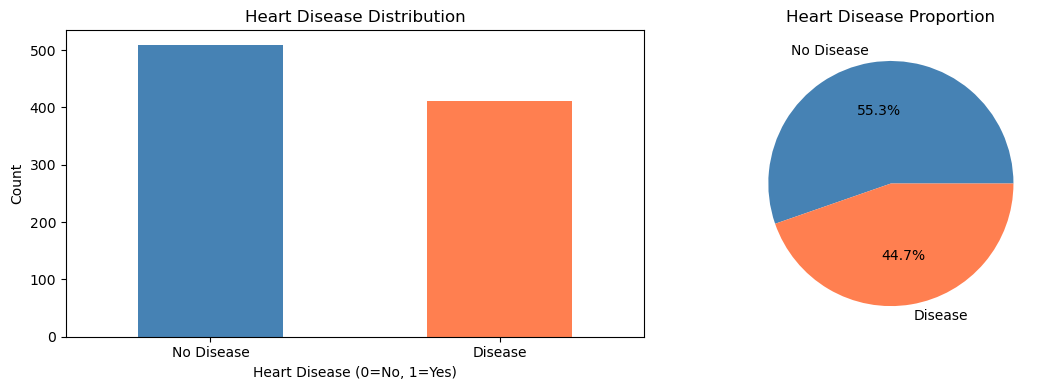

In [16]:
# Create binary target variable (0 = no disease, 1 = disease)
# Original 'num' has values 0-4, where 0 = no disease, 1-4 = presence of disease
df['heart_disease'] = (df['num'] > 0).astype(int)

print("Target variable distribution:")
print(df['heart_disease'].value_counts())
print(f"\nPercentage with heart disease: {df['heart_disease'].mean()*100:.2f}%")

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
df['heart_disease'].value_counts().plot(kind='bar', ax=axes[0], color=['steelblue', 'coral'])
axes[0].set_title('Heart Disease Distribution')
axes[0].set_xlabel('Heart Disease (0=No, 1=Yes)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['No Disease', 'Disease'], rotation=0)

# Pie chart
df['heart_disease'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                         colors=['steelblue', 'coral'], labels=['No Disease', 'Disease'])
axes[1].set_title('Heart Disease Proportion')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

## Exploratory Data Analysis

### Summary Statistics

In [19]:
# Summary statistics for numerical variables
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num,heart_disease
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,131.995652,199.908696,137.692391,0.853261,0.227174,0.995652,0.553261
std,265.725422,9.424685,18.451300,109.040171,25.145235,1.058049,0.628936,1.142693,0.497426
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000,1.000000
75%,690.250000,60.000000,140.000000,267.000000,156.000000,1.500000,0.000000,2.000000,1.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000,1.000000


In [21]:
# Summary statistics for categorical variables
df.describe(include='object')

,sex,dataset,cp,restecg,slope,thal
count,920,920,920,920,920,920
unique,2,4,4,3,3,3
top,Male,Cleveland,asymptomatic,normal,flat,normal
freq,726,304,496,553,654,682


### Univariate Analysis - Numerical Variables

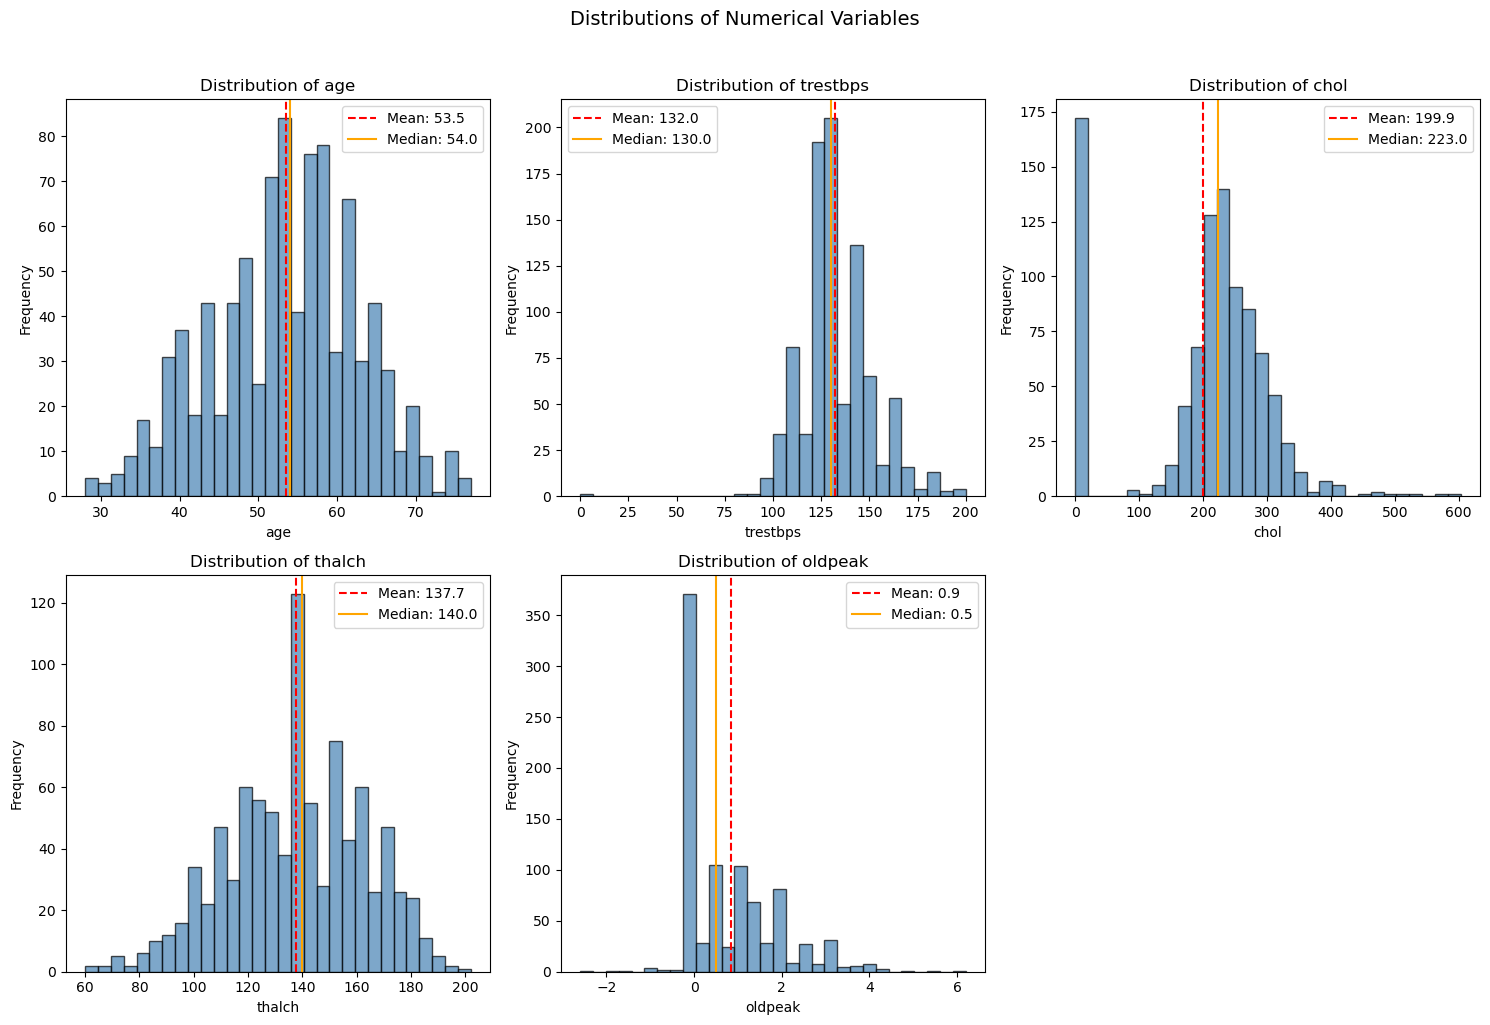

In [24]:
# Distribution of numerical variables
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(df[col].dropna(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.1f}')
    axes[i].axvline(df[col].median(), color='orange', linestyle='-', label=f'Median: {df[col].median():.1f}')
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

axes[-1].axis('off')
plt.suptitle('Distributions of Numerical Variables', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

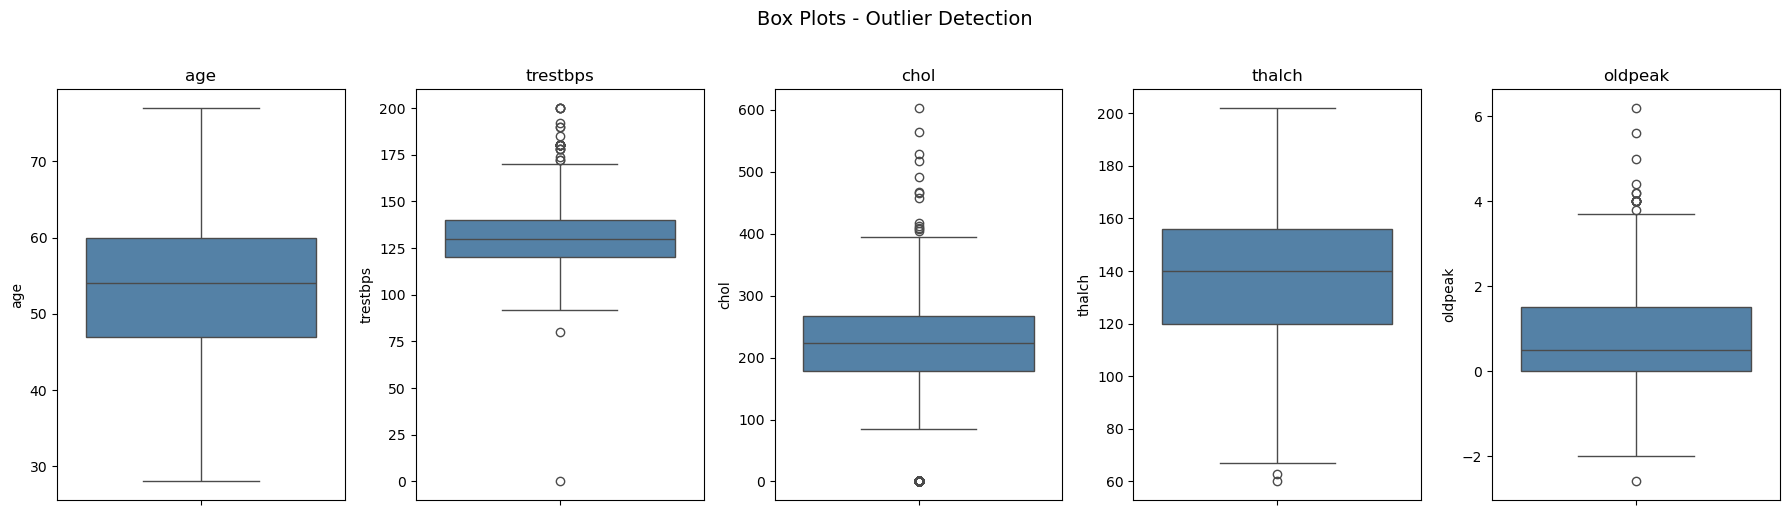

In [26]:
# Box plots to detect outliers
fig, axes = plt.subplots(1, 5, figsize=(18, 5))

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, y=col, ax=axes[i], color='steelblue')
    axes[i].set_title(f'{col}')

plt.suptitle('Box Plots - Outlier Detection', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### Univariate Analysis - Categorical Variables

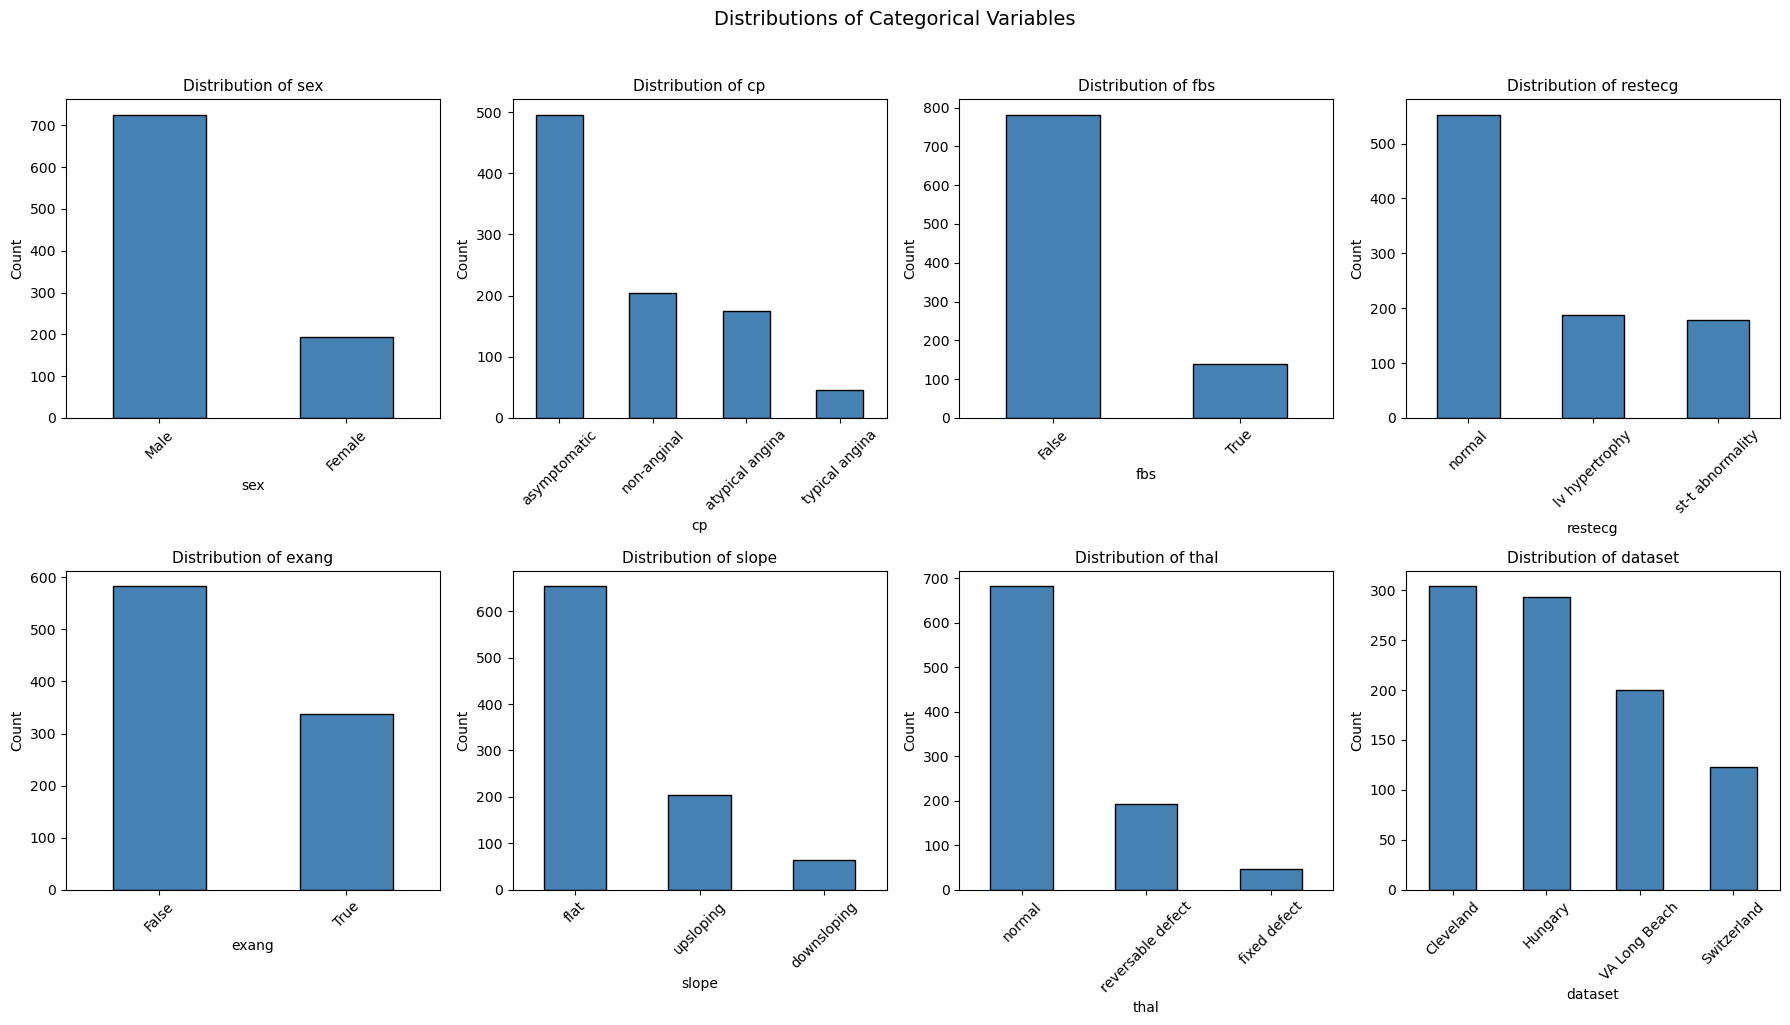

In [29]:
# Distribution of categorical variables
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'dataset']

fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[i], color='steelblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}', fontsize=11)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Distributions of Categorical Variables', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### Bivariate Analysis - Features vs Target

/var/folders/w6/vv9tmcm5099738crhgdb87cm0000gn/T/ipykernel_20124/2676265904.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='heart_disease', y=col, ax=axes[i], palette=['steelblue', 'coral'])
/var/folders/w6/vv9tmcm5099738crhgdb87cm0000gn/T/ipykernel_20124/2676265904.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['No Disease', 'Disease'])
/var/folders/w6/vv9tmcm5099738crhgdb87cm0000gn/T/ipykernel_20124/2676265904.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='heart_disease', y=col, ax=axes[i], palette=['steelblue', 'coral'])
/var/folders/w6/vv9tm

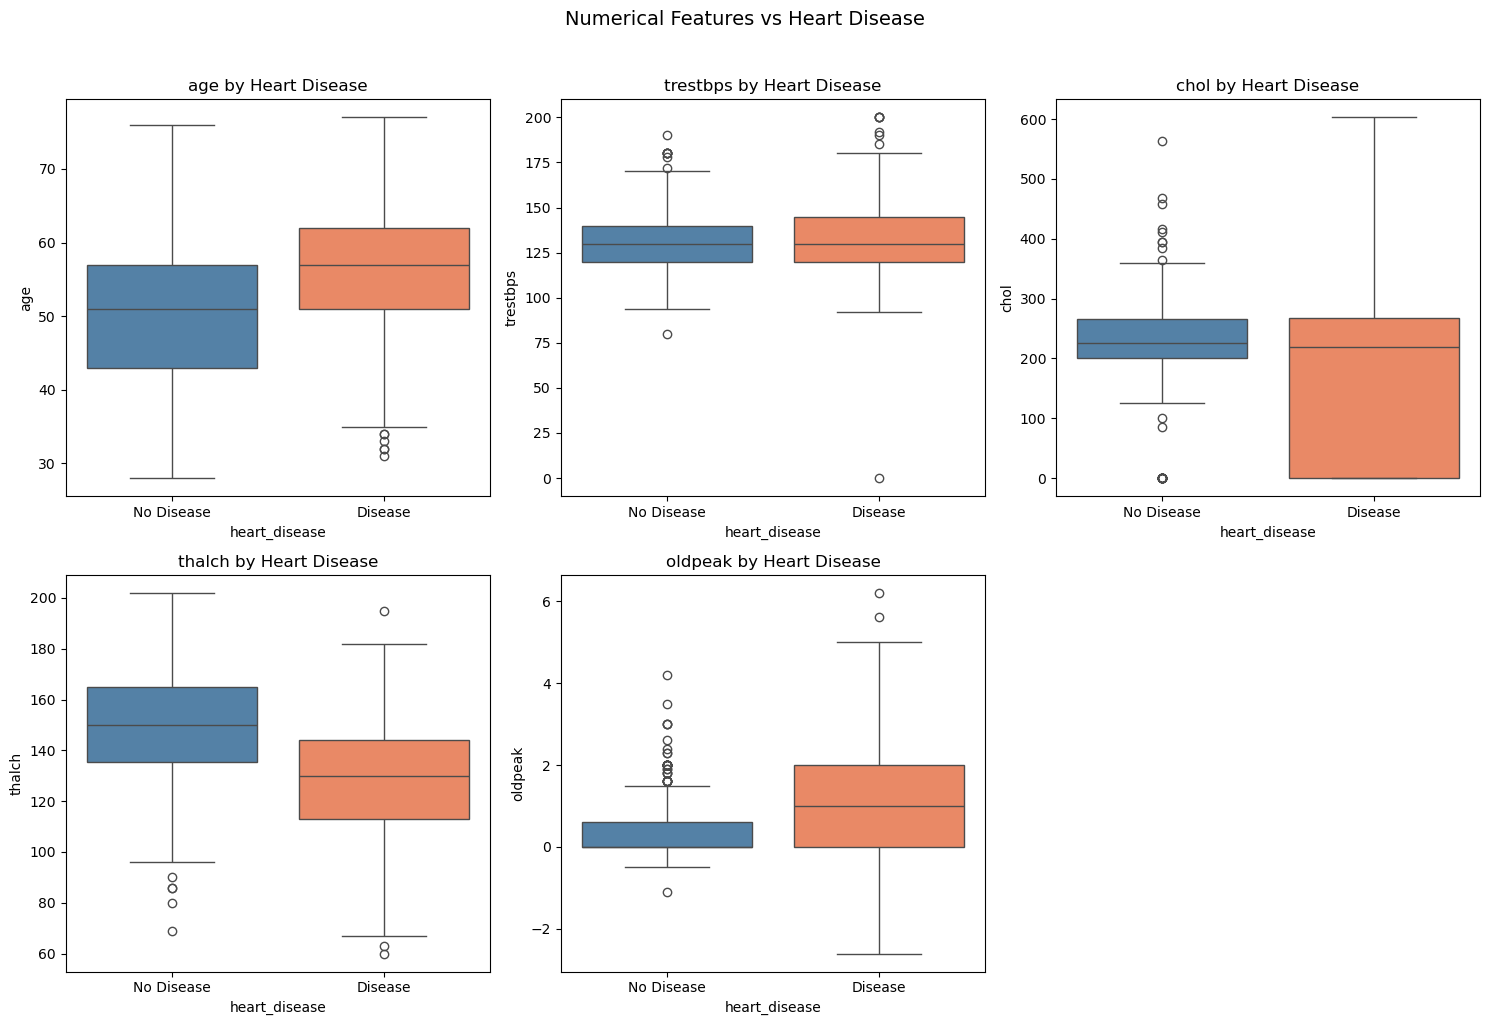

In [32]:
# Numerical features vs heart disease
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x='heart_disease', y=col, ax=axes[i], palette=['steelblue', 'coral'])
    axes[i].set_title(f'{col} by Heart Disease')
    axes[i].set_xticklabels(['No Disease', 'Disease'])

axes[-1].axis('off')
plt.suptitle('Numerical Features vs Heart Disease', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

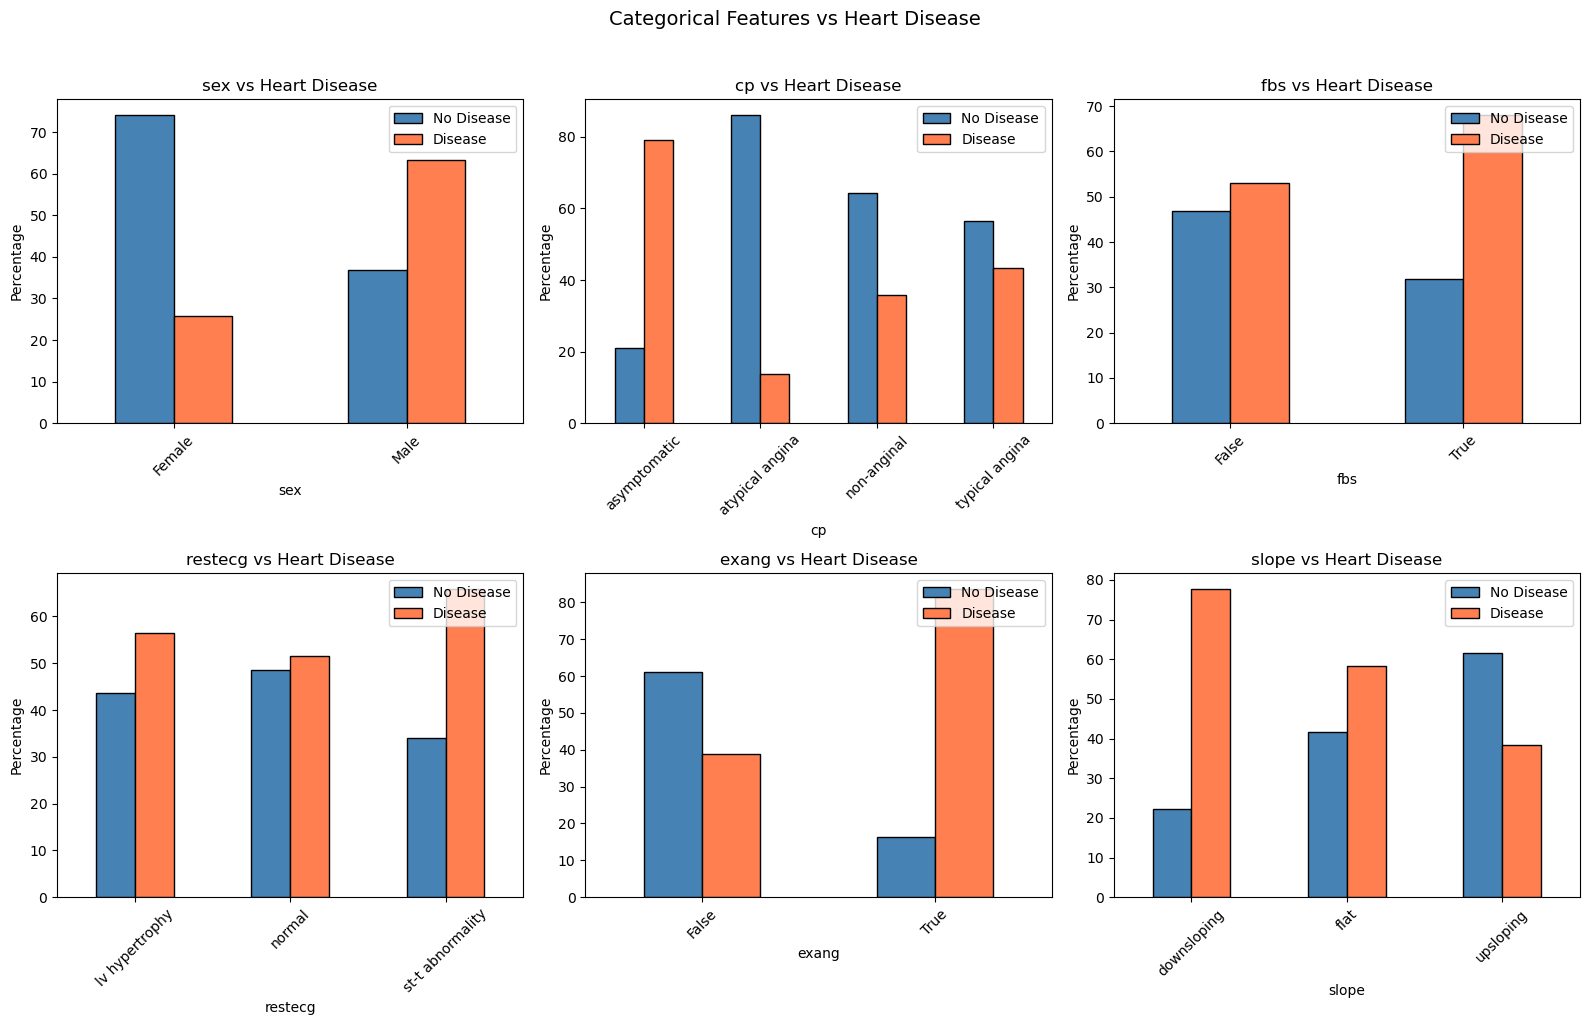

In [34]:
# Categorical features vs heart disease
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(cat_features):
    cross_tab = pd.crosstab(df[col], df['heart_disease'], normalize='index') * 100
    cross_tab.plot(kind='bar', ax=axes[i], color=['steelblue', 'coral'], edgecolor='black')
    axes[i].set_title(f'{col} vs Heart Disease')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Percentage')
    axes[i].legend(['No Disease', 'Disease'], loc='upper right')
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Categorical Features vs Heart Disease', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### Correlation Analysis

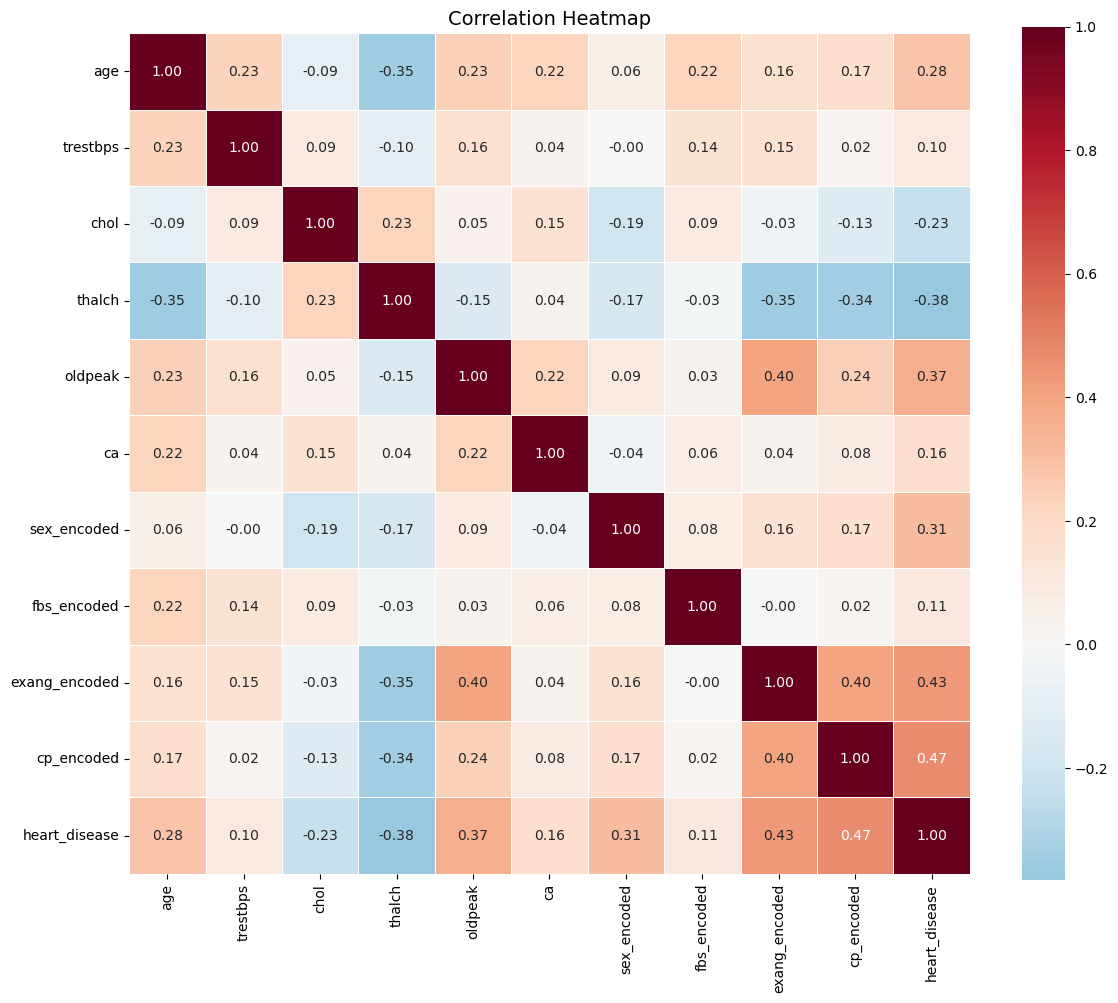

In [37]:
# Encode categorical variables for correlation
df_encoded = df.copy()

# Binary encoding
df_encoded['sex_encoded'] = (df_encoded['sex'] == 'Male').astype(int)
df_encoded['fbs_encoded'] = (df_encoded['fbs'] == True).astype(int)
df_encoded['exang_encoded'] = (df_encoded['exang'] == True).astype(int)

# Ordinal encoding for chest pain
cp_mapping = {'typical angina': 0, 'atypical angina': 1, 'non-anginal': 2, 'asymptomatic': 3}
df_encoded['cp_encoded'] = df_encoded['cp'].map(cp_mapping)

# Select numeric columns for correlation
corr_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 
             'sex_encoded', 'fbs_encoded', 'exang_encoded', 'cp_encoded', 'heart_disease']

correlation_matrix = df_encoded[corr_cols].corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

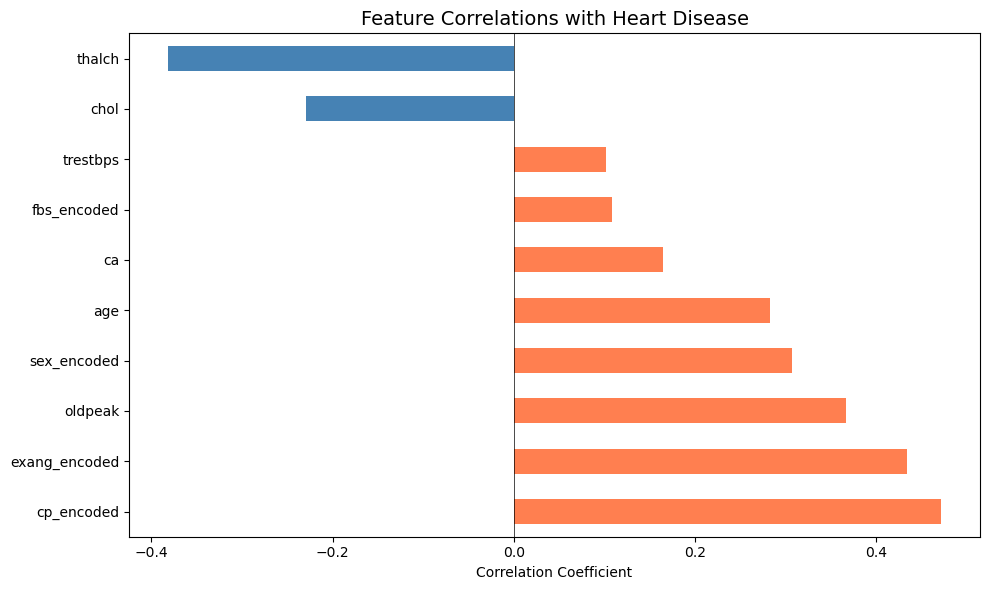

In [39]:
# Correlations with target variable
target_corr = correlation_matrix['heart_disease'].drop('heart_disease').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
colors = ['coral' if x > 0 else 'steelblue' for x in target_corr.values]
target_corr.plot(kind='barh', color=colors)
plt.title('Feature Correlations with Heart Disease', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

## Feature Engineering & Preprocessing

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Create a copy for modeling
df_model = df.copy()

# Drop unnecessary columns
df_model = df_model.drop(['id', 'dataset', 'num'], axis=1)

print(f"Shape after dropping columns: {df_model.shape}")
df_model.head()

Shape after dropping columns: (920, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,heart_disease
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [44]:
# Encode categorical variables
# Binary variables
df_model['sex'] = (df_model['sex'] == 'Male').astype(int)
df_model['fbs'] = (df_model['fbs'] == True).astype(int)
df_model['exang'] = (df_model['exang'] == True).astype(int)

# One-hot encode multi-category variables
df_model = pd.get_dummies(df_model, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

print(f"Shape after encoding: {df_model.shape}")
print(f"\nColumns: {list(df_model.columns)}")

Shape after encoding: (920, 19)

Columns: ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca', 'heart_disease', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'restecg_normal', 'restecg_st-t abnormality', 'slope_flat', 'slope_upsloping', 'thal_normal', 'thal_reversable defect']


In [46]:
# Feature engineering - create new features

# First, let's check for any remaining issues
print("Checking for problematic values:")
print(f"trestbps range: {df_model['trestbps'].min()} - {df_model['trestbps'].max()}")
print(f"chol range: {df_model['chol'].min()} - {df_model['chol'].max()}")
print(f"age range: {df_model['age'].min()} - {df_model['age'].max()}")

# Age groups using np.select for more control
conditions_age = [
    df_model['age'] <= 40,
    (df_model['age'] > 40) & (df_model['age'] <= 55),
    (df_model['age'] > 55) & (df_model['age'] <= 70),
    df_model['age'] > 70
]
df_model['age_group'] = np.select(conditions_age, [0, 1, 2, 3], default=1)

# Cholesterol risk levels
conditions_chol = [
    df_model['chol'] <= 200,
    (df_model['chol'] > 200) & (df_model['chol'] <= 240),
    df_model['chol'] > 240
]
df_model['chol_risk'] = np.select(conditions_chol, [0, 1, 2], default=0)

# Blood pressure categories
conditions_bp = [
    df_model['trestbps'] <= 120,
    (df_model['trestbps'] > 120) & (df_model['trestbps'] <= 140),
    df_model['trestbps'] > 140
]
df_model['bp_category'] = np.select(conditions_bp, [0, 1, 2], default=1)

# Heart rate reserve (max HR - resting, using 220-age as proxy for max)
df_model['hr_reserve'] = (220 - df_model['age']) - df_model['thalch']

print("New features created!")
print(f"Shape: {df_model.shape}")
df_model.head()

Checking for problematic values:
trestbps range: 0.0 - 200.0
chol range: 0.0 - 603.0
age range: 28 - 77
New features created!
Shape: (920, 23)


,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,heart_disease,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,age_group,chol_risk,bp_category,hr_reserve
0,63,1,145.0,233.0,1,150.0,0,2.3,0.0,0,False,False,True,False,False,False,False,False,False,2,1,2,7.0
1,67,1,160.0,286.0,0,108.0,1,1.5,3.0,1,False,False,False,False,False,True,False,True,False,2,2,2,45.0
2,67,1,120.0,229.0,0,129.0,1,2.6,2.0,1,False,False,False,False,False,True,False,False,True,2,1,0,24.0
3,37,1,130.0,250.0,0,187.0,0,3.5,0.0,0,False,True,False,True,False,False,False,True,False,0,2,1,-4.0
4,41,0,130.0,204.0,0,172.0,0,1.4,0.0,0,True,False,False,False,False,False,True,True,False,1,1,1,7.0


In [48]:
# Split features and target
X = df_model.drop('heart_disease', axis=1)
y = df_model['heart_disease']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTarget distribution in training set:")
print(y_train.value_counts(normalize=True))

Training set: 736 samples
Test set: 184 samples

Target distribution in training set:
heart_disease
1    0.552989
0    0.447011
Name: proportion, dtype: float64


In [ ]:
# Scale numerical features (avoiding SettingWithCopyWarning)
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'hr_reserve']

# Create copies to avoid modifying views
X_train = X_train.copy()
X_test = X_test.copy()

scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print("Features scaled!")
X_train.head()

## Model Building

### 1. Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions
lr_pred = lr_model.predict(X_test)
lr_pred_proba = lr_model.predict_proba(X_test)[:, 1]

# Evaluation
print("=" * 50)
print("LOGISTIC REGRESSION RESULTS")
print("=" * 50)
print(f"\nAccuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, lr_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, lr_pred_proba):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, lr_pred))

LOGISTIC REGRESSION RESULTS

Accuracy: 0.8207
Precision: 0.8224
Recall: 0.8627
F1 Score: 0.8421
ROC AUC: 0.9017

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        82
           1       0.82      0.86      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184



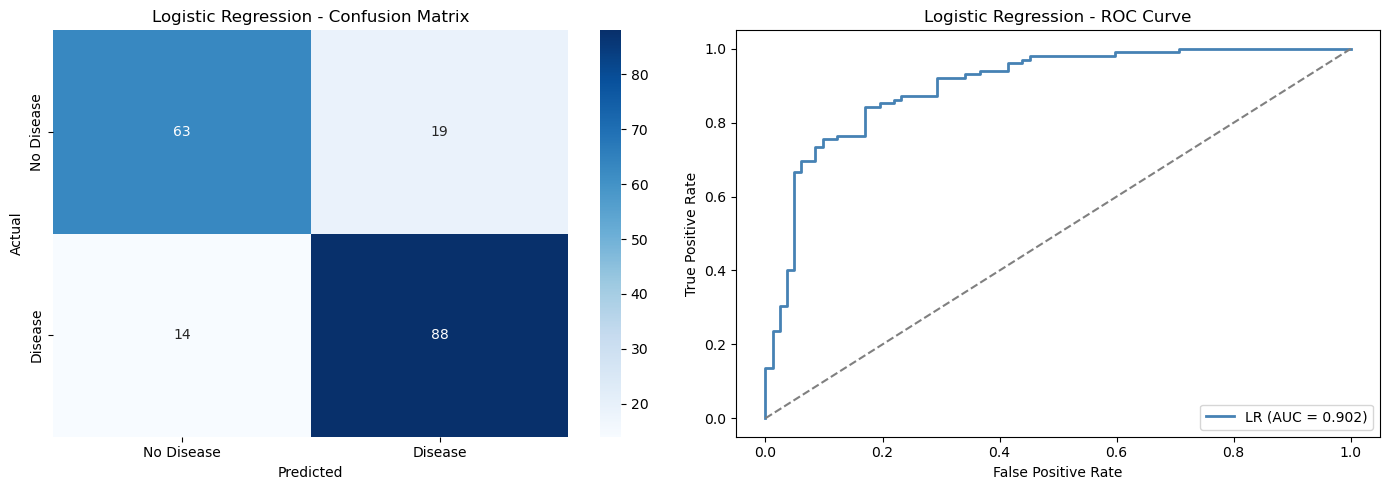

In [55]:
# Logistic Regression - Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
axes[0].set_title('Logistic Regression - Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_pred_proba)
axes[1].plot(fpr_lr, tpr_lr, color='steelblue', lw=2, label=f'LR (AUC = {roc_auc_score(y_test, lr_pred_proba):.3f})')
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Logistic Regression - ROC Curve')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

### 2. XGBoost

In [58]:
# Install XGBoost if not available
try:
    import xgboost as xgb
    print("XGBoost is already installed!")
except ImportError:
    print("Installing XGBoost...")
    !pip install xgboost
    import xgboost as xgb
    print("XGBoost installed successfully!")

XGBoost is already installed!


In [60]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_pred = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("=" * 50)
print("XGBOOST RESULTS")
print("=" * 50)
print(f"\nAccuracy: {accuracy_score(y_test, xgb_pred):.4f}")
print(f"Precision: {precision_score(y_test, xgb_pred):.4f}")
print(f"Recall: {recall_score(y_test, xgb_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, xgb_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, xgb_pred_proba):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, xgb_pred))

XGBOOST RESULTS

Accuracy: 0.8370
Precision: 0.8273
Recall: 0.8922
F1 Score: 0.8585
ROC AUC: 0.9026

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        82
           1       0.83      0.89      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



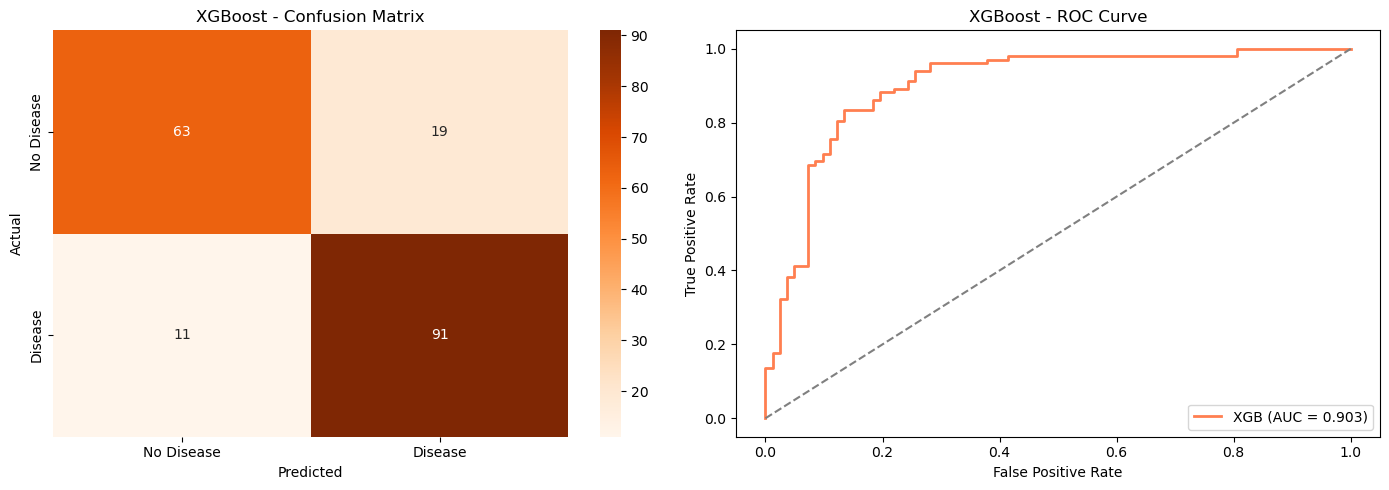

In [62]:
# XGBoost - Confusion Matrix and ROC
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', ax=axes[0],
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
axes[0].set_title('XGBoost - Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_pred_proba)
axes[1].plot(fpr_xgb, tpr_xgb, color='coral', lw=2, label=f'XGB (AUC = {roc_auc_score(y_test, xgb_pred_proba):.3f})')
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('XGBoost - ROC Curve')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

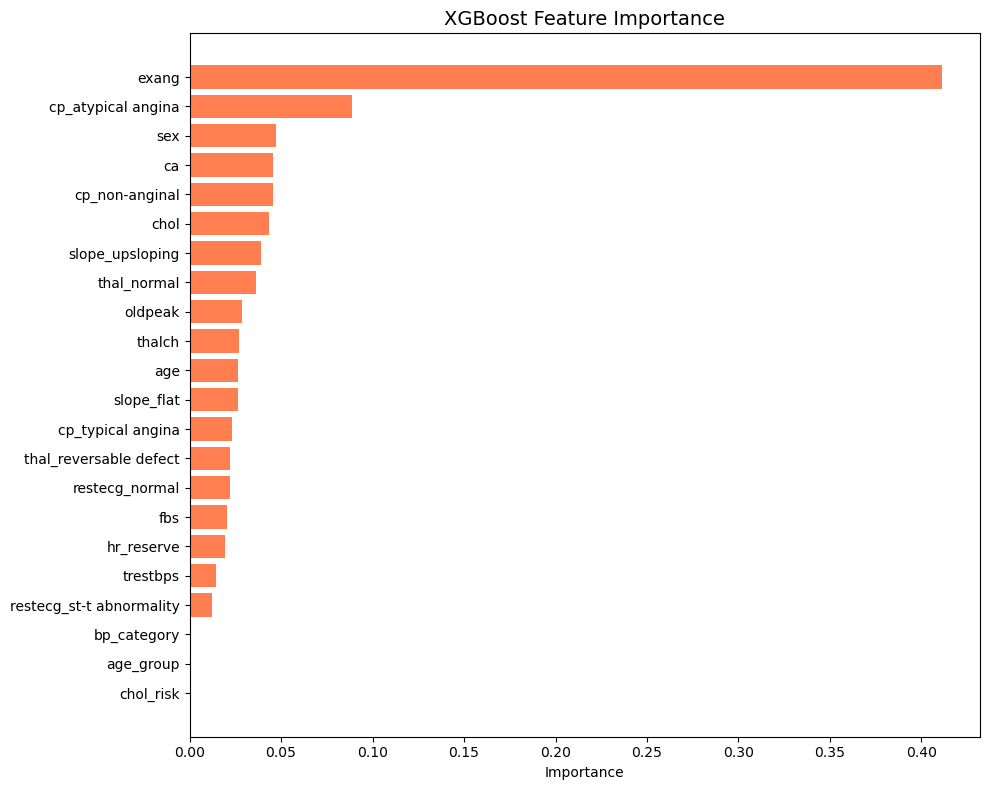

In [64]:
# XGBoost Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='coral')
plt.xlabel('Importance')
plt.title('XGBoost Feature Importance', fontsize=14)
plt.tight_layout()
plt.show()

### 3. Additional Models - Random Forest & SVM

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Train SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_pred_proba = svm_model.predict_proba(X_test)[:, 1]

# Results
print("=" * 50)
print("RANDOM FOREST RESULTS")
print("=" * 50)
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, rf_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, rf_pred_proba):.4f}")

print("\n" + "=" * 50)
print("SVM RESULTS")
print("=" * 50)
print(f"Accuracy: {accuracy_score(y_test, svm_pred):.4f}")
print(f"Precision: {precision_score(y_test, svm_pred):.4f}")
print(f"Recall: {recall_score(y_test, svm_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, svm_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, svm_pred_proba):.4f}")

### 4. Hyperparameter Tuning with GridSearchCV

## Model Comparison

### Cross-Validation Analysis

Comparing training vs test performance and running k-fold cross-validation to check for overfitting.

In [68]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation for Logistic Regression
lr_cv_scores = cross_val_score(LogisticRegression(random_state=42, max_iter=1000), 
                                X_train, y_train, cv=cv, scoring='accuracy')
lr_cv_f1 = cross_val_score(LogisticRegression(random_state=42, max_iter=1000), 
                            X_train, y_train, cv=cv, scoring='f1')
lr_cv_auc = cross_val_score(LogisticRegression(random_state=42, max_iter=1000), 
                             X_train, y_train, cv=cv, scoring='roc_auc')

# Cross-validation for XGBoost
xgb_cv_scores = cross_val_score(XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, 
                                               random_state=42, eval_metric='logloss'), 
                                 X_train, y_train, cv=cv, scoring='accuracy')
xgb_cv_f1 = cross_val_score(XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, 
                                           random_state=42, eval_metric='logloss'), 
                             X_train, y_train, cv=cv, scoring='f1')
xgb_cv_auc = cross_val_score(XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, 
                                            random_state=42, eval_metric='logloss'), 
                              X_train, y_train, cv=cv, scoring='roc_auc')

print("=" * 60)
print("5-FOLD CROSS-VALIDATION RESULTS")
print("=" * 60)
print(f"\nLogistic Regression:")
print(f"  Accuracy: {lr_cv_scores.mean():.4f} (+/- {lr_cv_scores.std()*2:.4f})")
print(f"  F1 Score: {lr_cv_f1.mean():.4f} (+/- {lr_cv_f1.std()*2:.4f})")
print(f"  ROC AUC:  {lr_cv_auc.mean():.4f} (+/- {lr_cv_auc.std()*2:.4f})")

print(f"\nXGBoost:")
print(f"  Accuracy: {xgb_cv_scores.mean():.4f} (+/- {xgb_cv_scores.std()*2:.4f})")
print(f"  F1 Score: {xgb_cv_f1.mean():.4f} (+/- {xgb_cv_f1.std()*2:.4f})")
print(f"  ROC AUC:  {xgb_cv_auc.mean():.4f} (+/- {xgb_cv_auc.std()*2:.4f})")

5-FOLD CROSS-VALIDATION RESULTS

Logistic Regression:
  Accuracy: 0.8098 (+/- 0.0452)
  F1 Score: 0.8313 (+/- 0.0286)
  ROC AUC:  0.8867 (+/- 0.0430)

XGBoost:
  Accuracy: 0.7935 (+/- 0.0714)
  F1 Score: 0.8191 (+/- 0.0480)
  ROC AUC:  0.8597 (+/- 0.0479)


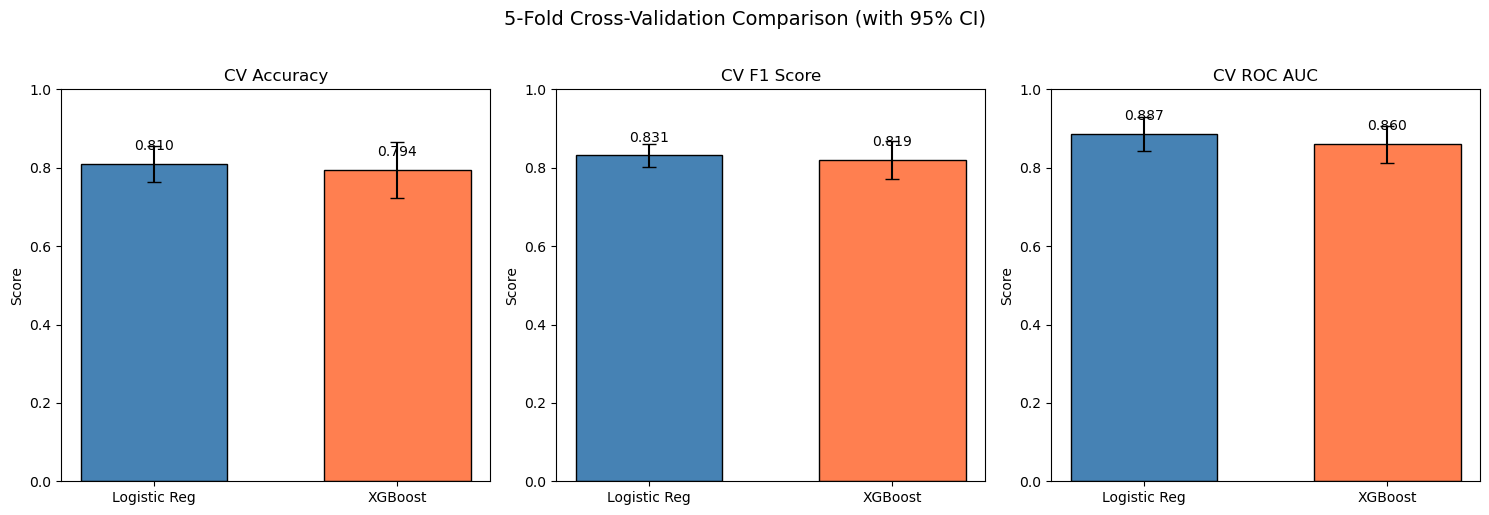

In [69]:
# Visualize cross-validation results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics = ['Accuracy', 'F1 Score', 'ROC AUC']
lr_means = [lr_cv_scores.mean(), lr_cv_f1.mean(), lr_cv_auc.mean()]
lr_stds = [lr_cv_scores.std(), lr_cv_f1.std(), lr_cv_auc.std()]
xgb_means = [xgb_cv_scores.mean(), xgb_cv_f1.mean(), xgb_cv_auc.mean()]
xgb_stds = [xgb_cv_scores.std(), xgb_cv_f1.std(), xgb_cv_auc.std()]

x = np.arange(2)
width = 0.6

for idx, (metric, lr_m, lr_s, xgb_m, xgb_s) in enumerate(zip(metrics, lr_means, lr_stds, xgb_means, xgb_stds)):
    bars = axes[idx].bar(x, [lr_m, xgb_m], width, yerr=[lr_s*2, xgb_s*2], 
                          color=['steelblue', 'coral'], capsize=5, edgecolor='black')
    axes[idx].set_ylabel('Score')
    axes[idx].set_title(f'CV {metric}')
    axes[idx].set_xticks(x)
    axes[idx].set_xticklabels(['Logistic Reg', 'XGBoost'])
    axes[idx].set_ylim(0, 1)
    
    # Add value labels
    for bar, mean, std in zip(bars, [lr_m, xgb_m], [lr_s, xgb_s]):
        axes[idx].annotate(f'{mean:.3f}', xy=(bar.get_x() + bar.get_width()/2, mean),
                           xytext=(0, 10), textcoords='offset points', ha='center', fontsize=10)

plt.suptitle('5-Fold Cross-Validation Comparison (with 95% CI)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

OVERFITTING CHECK: Training vs Test Accuracy

Logistic Regression:
  Training Accuracy: 0.8220
  Test Accuracy:     0.8207
  Difference:        0.0014
  Status: Good generalization

XGBoost:
  Training Accuracy: 0.9715
  Test Accuracy:     0.8370
  Difference:        0.1345
  Status: Possible overfitting!


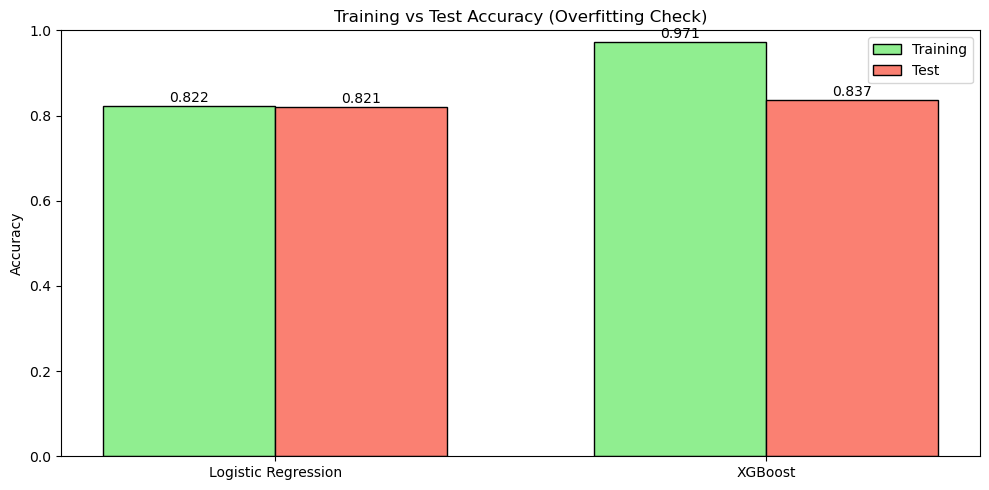

In [72]:
# Check for overfitting: Compare training vs test performance
lr_train_acc = lr_model.score(X_train, y_train)
lr_test_acc = accuracy_score(y_test, lr_pred)

xgb_train_acc = xgb_model.score(X_train, y_train)
xgb_test_acc = accuracy_score(y_test, xgb_pred)

print("=" * 60)
print("OVERFITTING CHECK: Training vs Test Accuracy")
print("=" * 60)
print(f"\nLogistic Regression:")
print(f"  Training Accuracy: {lr_train_acc:.4f}")
print(f"  Test Accuracy:     {lr_test_acc:.4f}")
print(f"  Difference:        {lr_train_acc - lr_test_acc:.4f}")
if lr_train_acc - lr_test_acc > 0.05:
    print("  Status: Possible overfitting!")
else:
    print("  Status: Good generalization")

print(f"\nXGBoost:")
print(f"  Training Accuracy: {xgb_train_acc:.4f}")
print(f"  Test Accuracy:     {xgb_test_acc:.4f}")
print(f"  Difference:        {xgb_train_acc - xgb_test_acc:.4f}")
if xgb_train_acc - xgb_test_acc > 0.05:
    print("  Status: Possible overfitting!")
else:
    print("  Status: Good generalization")

# Visualize
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(2)
width = 0.35

train_scores = [lr_train_acc, xgb_train_acc]
test_scores = [lr_test_acc, xgb_test_acc]

bars1 = ax.bar(x - width/2, train_scores, width, label='Training', color='lightgreen', edgecolor='black')
bars2 = ax.bar(x + width/2, test_scores, width, label='Test', color='salmon', edgecolor='black')

ax.set_ylabel('Accuracy')
ax.set_title('Training vs Test Accuracy (Overfitting Check)')
ax.set_xticks(x)
ax.set_xticklabels(['Logistic Regression', 'XGBoost'])
ax.legend()
ax.set_ylim(0, 1)

# Add value labels
for bar in bars1:
    ax.annotate(f'{bar.get_height():.3f}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                xytext=(0, 3), textcoords='offset points', ha='center')
for bar in bars2:
    ax.annotate(f'{bar.get_height():.3f}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                xytext=(0, 3), textcoords='offset points', ha='center')

plt.tight_layout()
plt.show()

In [74]:
# Compare models side by side
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Logistic Regression': [
        accuracy_score(y_test, lr_pred),
        precision_score(y_test, lr_pred),
        recall_score(y_test, lr_pred),
        f1_score(y_test, lr_pred),
        roc_auc_score(y_test, lr_pred_proba)
    ],
    'XGBoost': [
        accuracy_score(y_test, xgb_pred),
        precision_score(y_test, xgb_pred),
        recall_score(y_test, xgb_pred),
        f1_score(y_test, xgb_pred),
        roc_auc_score(y_test, xgb_pred_proba)
    ]
})

comparison_df = comparison_df.round(4)
print("\n" + "=" * 60)
print("MODEL COMPARISON")
print("=" * 60)
print(comparison_df.to_string(index=False))


MODEL COMPARISON
   Metric  Logistic Regression  XGBoost
 Accuracy               0.8207   0.8370
Precision               0.8224   0.8273
   Recall               0.8627   0.8922
 F1 Score               0.8421   0.8585
  ROC AUC               0.9017   0.9026


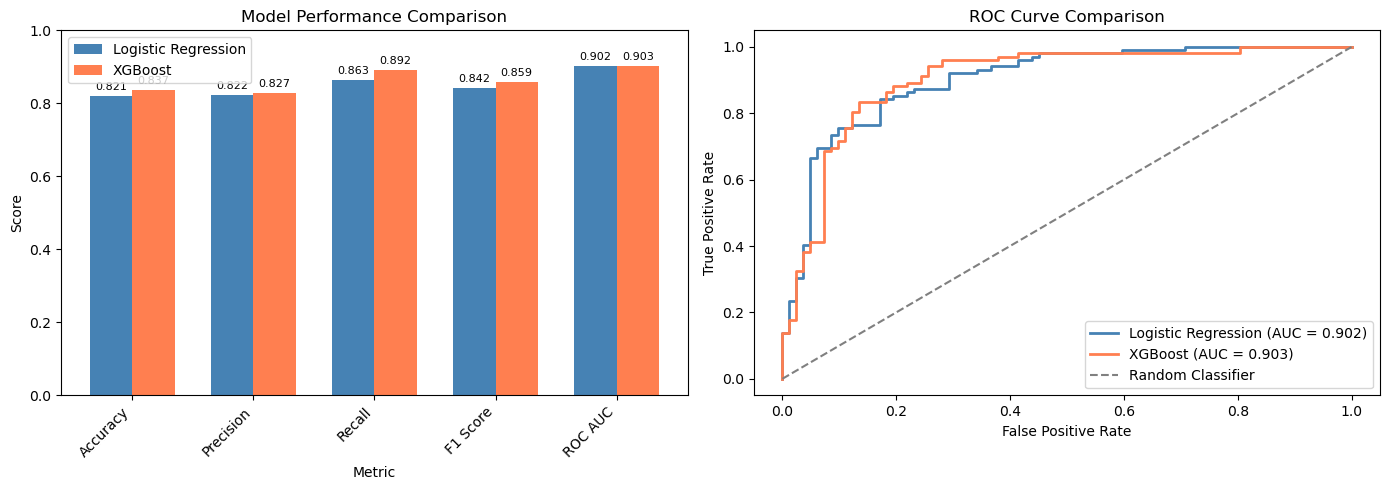

In [76]:
# Visual comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart comparison
x = np.arange(len(comparison_df['Metric']))
width = 0.35

bars1 = axes[0].bar(x - width/2, comparison_df['Logistic Regression'], width, label='Logistic Regression', color='steelblue')
bars2 = axes[0].bar(x + width/2, comparison_df['XGBoost'], width, label='XGBoost', color='coral')

axes[0].set_xlabel('Metric')
axes[0].set_ylabel('Score')
axes[0].set_title('Model Performance Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison_df['Metric'], rotation=45, ha='right')
axes[0].legend()
axes[0].set_ylim(0, 1)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    axes[0].annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width()/2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)
for bar in bars2:
    height = bar.get_height()
    axes[0].annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width()/2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

# ROC Curves comparison
axes[1].plot(fpr_lr, tpr_lr, color='steelblue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, lr_pred_proba):.3f})')
axes[1].plot(fpr_xgb, tpr_xgb, color='coral', lw=2, label=f'XGBoost (AUC = {roc_auc_score(y_test, xgb_pred_proba):.3f})')
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve Comparison')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

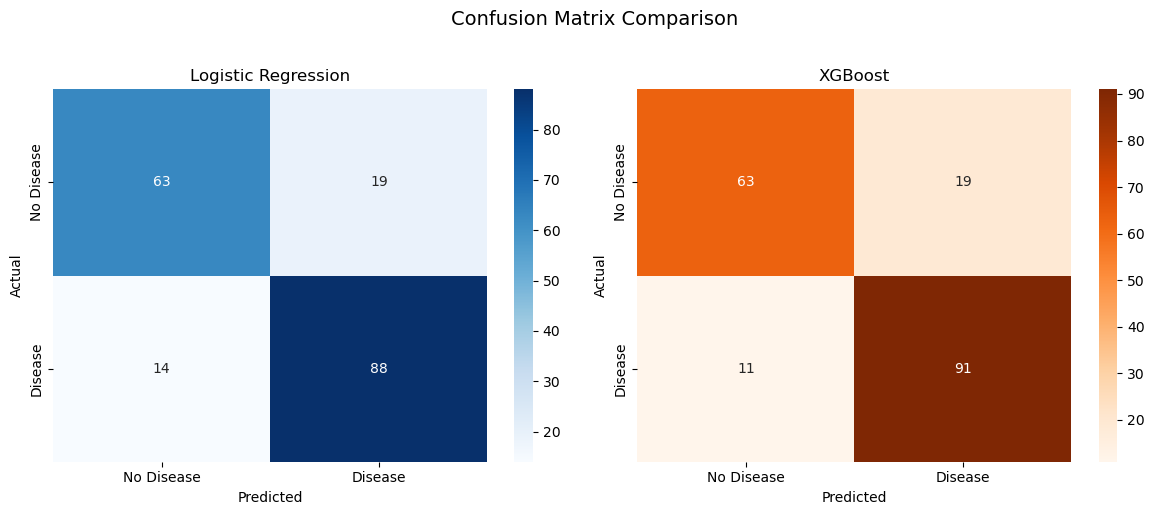

In [78]:
# Confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', ax=axes[1],
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
axes[1].set_title('XGBoost')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.suptitle('Confusion Matrix Comparison', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [80]:
# Summary and conclusions
print("\n" + "=" * 60)
print("SUMMARY")
print("=" * 60)

# Determine winner for each metric
for idx, row in comparison_df.iterrows():
    metric = row['Metric']
    lr_score = row['Logistic Regression']
    xgb_score = row['XGBoost']
    
    if lr_score > xgb_score:
        winner = 'Logistic Regression'
        diff = lr_score - xgb_score
    elif xgb_score > lr_score:
        winner = 'XGBoost'
        diff = xgb_score - lr_score
    else:
        winner = 'Tie'
        diff = 0
    
    print(f"{metric}: {winner} wins by {diff:.4f}")

print("\n" + "=" * 60)
print("ANALYSIS COMPLETE!")
print("=" * 60)


SUMMARY
Accuracy: XGBoost wins by 0.0163
Precision: XGBoost wins by 0.0049
Recall: XGBoost wins by 0.0295
F1 Score: XGBoost wins by 0.0164
ROC AUC: XGBoost wins by 0.0009

ANALYSIS COMPLETE!
